In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
# Replace 'your_file.xlsx' with your actual filename
file_path = 'C:/Users/Khang Vinh Khac/Downloads/New_QN_data_1.xlsx'
table_path = 'C:/Users/Khang Vinh Khac/Downloads/ProjectID_Detail.xlsx'

# file_path = 'D:/AssetWise Project/New_QN_data (1).xlsx'
# table_path = 'D:/AssetWise Project/ProjectID_Detail.xlsx'

# For reading the first sheet
df = pd.read_excel(file_path, engine='openpyxl')
# For reading a specific sheet by name
table = pd.read_excel(table_path, engine='openpyxl')

In [6]:
df.rename(columns={'Occcupation': 'Occupation'}, inplace=True)
table.rename(columns={'Project ID': 'projectid'}, inplace=True)

In [7]:
merged_df = pd.merge(df, table, on='projectid', how='left')
merged_df

,customerid,projectid,questiondate,questiontime,fillindate,saledate,bookingdate,gender,purchasing_reason,decide_purchase_reason,...,purchase_intent,travel_route_today,marital_status,occupation,age,Type,Project Brand,Project Type,Starting Price,Location
0,144275,30,2564-09-23 13:35:41,2025-02-23 13:35:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,คอนโดมิเนียม,KAVE,Campus Condo,1670000,รามอินทรา-วัชรพล
1,144280,30,2564-09-23 14:00:44,2025-02-23 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,คอนโดมิเนียม,KAVE,Campus Condo,1670000,รามอินทรา-วัชรพล
2,148576,30,2564-11-03 11:49:59,2025-02-23 11:49:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,คอนโดมิเนียม,KAVE,Campus Condo,1670000,รามอินทรา-วัชรพล
3,148579,30,2564-11-03 11:52:25,2025-02-23 11:52:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,คอนโดมิเนียม,KAVE,Campus Condo,1670000,รามอินทรา-วัชรพล
4,148585,30,2564-11-03 12:12:23,2025-02-23 12:12:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,คอนโดมิเนียม,KAVE,Campus Condo,1670000,รามอินทรา-วัชรพล
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68864,1981-08-25 00:00:00,28,2562-02-28 03:28:00,2025-02-23 03:28:00,2562-02-28 03:28:00,2562-02-28 03:28:00,2562-02-28 03:28:00,NaN,NaN,NaN,...,NaN,NaN,สมรส มีบุตร (คน),NaN,NaN,คอนโดมิเนียม,ATMOZ,LOW RISE,1490000,แจ้งวัฒนะ
68865,1981-08-27 00:00:00,28,2562-02-28 03:36:00,2025-02-23 03:36:00,2562-02-28 03:36:00,2562-02-28 03:36:00,2562-02-28 03:36:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25-35 ปี,คอนโดมิเนียม,ATMOZ,LOW RISE,1490000,แจ้งวัฒนะ
68866,1989-02-28 00:00:00,28,2562-03-11 03:30:00,2025-02-23 03:30:00,2562-03-11 03:30:00,2562-03-11 03:30:00,2562-03-11 03:30:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36-45 ปี,คอนโดมิเนียม,ATMOZ,LOW RISE,1490000,แจ้งวัฒนะ
68867,2295-04-18 00:00:00,18,2564-09-24 14:06:31,2025-02-23 14:06:00,2564-09-24 14:06:31,2564-09-24 14:08:07,2564-09-24 14:13:02,ชาย,NaN,NaN,...,NaN,NaN,โสด,อื่นๆ,NaN,คอนโดมิเนียม,KAVE,Campus Condo,2590000,พหลโยธิน


# Preprocessing Data

In [8]:
df = merged_df.copy()

In [9]:
def fix_year(dt_str):
    if pd.isna(dt_str):
        return pd.NaT
    try:
        parts = str(dt_str).split('-')
        fixed_year = int(parts[0]) - 543 #2559 if you want to convert from Buddhist Era to Gregorian
        return pd.to_datetime(f"{fixed_year}-{'-'.join(parts[1:])}")
    except:
        return pd.NaT

df['questiondate'] = df['questiondate'].apply(fix_year)
df['bookingdate'] = df['bookingdate'].apply(fix_year)
df['has_booked'] = df['bookingdate'].notnull().astype(int)



In [10]:
condo_df = df[df['Type'] == 'คอนโดมิเนียม'].copy()
house_df = df[df['Type'] != 'คอนโดมิเนียม'].copy()

In [11]:
def add_seasonal_features(df, date_column):
    """Add temporal features that help capture seasonal patterns"""
    df['hour'] = df['questiondate'].dt.hour
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df.drop(columns=['hour'], inplace=True)  # Remove original hour column if needed
    df['day'] = df[date_column].dt.day
    df['month'] = df[date_column].dt.month
    df['quarter'] = df[date_column].dt.quarter
    df['year'] = df[date_column].dt.year
    df['week'] = df[date_column].dt.isocalendar().week
    df['day_of_week'] = df[date_column].dt.dayofweek
    df['is_weekend'] = (df[date_column].dt.dayofweek >= 5).astype(int)  # 1 if weekend, 0 if weekday
    df['day_of_year'] = df[date_column].dt.dayofyear
    df['season'] = df[date_column].dt.month % 12 // 3 + 1
    return df

# Apply to your condo_df before splitting
condo_df = add_seasonal_features(condo_df, 'questiondate')

## Binning

In [12]:
import pandas as pd
import numpy as np
import re

def create_bin_assignment_functions():
    """Returns functions for processing different income/budget columns"""
    
    # Standardized bin ranges
    budget_bins = [
        (0, 1.01, "≤ 1.0M"),
        (1.01, 1.51, "1.01 - 1.5M"),
        (1.51, 2.01, "1.51 - 2.0M"),
        (2.01, 2.51, "2.01 - 2.5M"),
        (2.51, 3.01, "2.51 - 3.0M"),
        (3.01, 3.51, "3.01 - 3.5M"),
        (3.51, 4.01, "3.51 - 4.0M"),
        (4.01, 4.51, "4.01 - 4.5M"),
        (4.51, 5.01, "4.51 - 5.0M"),
        (5.01, 6.01, "5.01 - 6.0M"),
        (6.01, 7.01, "6.01 - 7.0M"),
        (7.01, 8.01, "7.01 - 8.0M"),
        (8.01, 9.01, "8.01 - 9.0M"),
        (9.01, 10.01, "9.01 - 10.0M"),
        (10.01, 11.01, "10.01 - 11.0M"),
        (11.01, 12.01, "11.01 - 12.0M"),
        (12.01, 13.01, "12.01 - 13.0M"),
        (13.01, 14.01, "13.01 - 14.0M"),
        (14.01, 15.01, "14.01 - 15.0M"),
        (15.01, 16.01, "15.01 - 16.0M"),
        (16.01, 17.01, "16.01 - 17.0M"),
        (17.01, 20.01, "17.01 - 20.0M"),
        (20.01, 25.01, "20.01 - 25.0M"),
        (25.01, float("inf"), "≥ 25.01M")
    ]

    income_bins = [
        (0, 20001, '≤ 20,000'),
        (20001, 35001, '20,001 - 35,000'),
        (35001, 50001, '35,001 - 50,000'),
        (50001, 65001, '50,001 - 65,000'),
        (65001, 80001, '65,001 - 80,000'),
        (80001, 100001, '80,001 - 100,000'),
        (100001, 120001, '100,001 - 120,000'),
        (120001, 140001, '120,001 - 140,000'),
        (140001, 160001, '140,001 - 160,000'),
        (160001, 180001, '160,001 - 180,000'),
        (180001, 200001, '180,001 - 200,000'),
        (200001, 300001, '200,001 - 300,000'),
        (300001, 400001, '300,001 - 400,000'),
        (400001, float('inf'), '≥ 400,001'),
    ]

    individual_income_bins = [
        (0, 15001, '≤ 15,000'),
        (15001, 20001, '15,001 - 20,000'),
        (20001, 30001, '20,001 - 30,000'),
        (30001, 40001, '30,001 - 40,000'),
        (40001, 50001, '40,001 - 50,000'),
        (50001, 65001, '50,001 - 65,000'),
        (65001, 80001, '65,001 - 80,000'),
        (80001, 100001, '80,001 - 100,000'),
        (100001, 120001, '100,001 - 120,000'),
        (120001, 150001, '120,001 - 150,000'),
        (150001, 200001, '150,001 - 200,000'),
        (200001, 300001, '200,001 - 300,000'),
        (300001, 400001, '300,001 - 400,000'),
        (400001, float('inf'), '≥ 400,001'),
    ]

    def parse_value(val, is_income=False):
        """Parse string values to numeric midpoint"""
        if pd.isna(val):
            return np.nan
        
        val = str(val).replace(',', '').replace('บาท', '').replace('ล้าน', '').strip()
        
        # Handle different string patterns
        if 'ไม่เกิน' in val or 'น้อยกว่า' in val:
            nums = re.findall(r'\d+\.\d+|\d+', val)
            return float(nums[0]) - 0.01 if nums else np.nan
        elif 'มากกว่า' in val or 'ขึ้นไป' in val:
            nums = re.findall(r'\d+\.\d+|\d+', val)
            return float(nums[0]) + 0.01 if nums else np.nan
        
        nums = re.findall(r'\d+\.\d+|\d+', val)
        if len(nums) == 2:
            return (float(nums[0]) + float(nums[1])) / 2
        elif len(nums) == 1:
            return float(nums[0])
        return np.nan

    def assign_bin(mid, bins):
        """Assign value to appropriate bin"""
        if np.isnan(mid):
            return "Missing"
        for low, high, label in bins:
            if low <= mid < high:
                return label
        return "Out of Range"

    return {
        'process_budget': lambda x: assign_bin(parse_value(x), budget_bins),
        'process_family_income': lambda x: assign_bin(parse_value(x, True), income_bins),
        'process_individual_income': lambda x: assign_bin(parse_value(x, True), individual_income_bins)
    }

def clean_financial_columns(df):
    """Clean and categorize financial columns in the DataFrame"""
    processors = create_bin_assignment_functions()
    
    # Process each column
    if 'purchase_budget' in df.columns:
        df['purchase_budget'] = df['purchase_budget'].apply(processors['process_budget'])
    
    if 'family_monthly_income' in df.columns:
        df['family_monthly_income'] = df['family_monthly_income'].apply(processors['process_family_income'])
    
    if 'individual_monthly_income_baht' in df.columns:
        df['individual_monthly_income_baht'] = df['individual_monthly_income_baht'].apply(processors['process_individual_income'])
    
    return df

# Usage example
condo_df = clean_financial_columns(condo_df)

## Encoding and Translation

## Encoding

In [13]:
# =============================================
# ORDINAL ENCODING (for features with natural order)
# =============================================
ordinal_features = ['decision_time_frame', 'age', 'car_type', 'room_size_wanted',
                    'purchase_budget', 'residences_count', 'would_recommend', 'family_monthly_income',
                    'individual_monthly_income_baht', 'Project Type'
                    ]  # Add your ordinal feature names here
ordinal_categories = [['Missing', 'ภายใน 1 เดือน', '1 - 3 เดือน', '4 - 6 เดือน',
                  '7 - 12 เดือน', 'มากกว่า 1 ปี'],                                # Decision Time order (use en dash)
                ['Missing', 'ต่ำกว่า 25 ปี', '25-35 ปี', '36-45 ปี', '45 ปีขึ้นไป'],   # Age order (use en dash)
                ['Missing', 'ไม่มีรถ', 'มอเตอร์ไซค์', 'มอเตอร์ไซค์บิ๊กไบค์',
                  'ECO Car (Vios, Yaris, Jazz, City,  Mazda2 ...)',
                  'รถกระบะ 2/4 ประตู',
                  'รถเก๋ง Size M (Civic, Altis ...)','รถยนต์อเนกประสงค์ (SUV, MPV)',
                  'รถเก๋ง Size L (Accord, Camry ...)',
                  'รถเก๋ง Luxury (Benz ,BMW ,Lexus ,Volvo ,Audi ,Mini Cooper)'],  # CarType order (use en dash)
                ['Missing', 'น้อยกว่า 23  ตร.ม.', '23-25 ตร.ม.', '26-29 ตร.ม.','30-34 ตร.ม.', '35-39 ตร.ม.',
                 '40-50 ตร.ม.', '51-60 ตร.ม.', '61-80 ตร.ม.', '81-100 ตร.ม.',
                 '101 -140 ตร.ม.', '191-200 ตร.ม.', '200 - 250 ตร.ม.', ''], # Room Size Wanted
                 ['Missing', "≤ 1.0M", "1.01 - 1.5M", "1.51 - 2.0M", "2.01 - 2.5M",
                  "2.51 - 3.0M", "3.01 - 3.5M", "3.51 - 4.0M", "4.01 - 4.5M",
                  "4.51 - 5.0M", "5.01 - 6.0M", "6.01 - 7.0M", "7.01 - 8.0M", "8.01 - 9.0M",
                  "9.01 - 10.0M", "10.01 - 11.0M", "11.01 - 12.0M", "12.01 - 13.0M",
                  "13.01 - 14.0M", "14.01 - 15.0M", "15.01 - 16.0M","16.01 - 17.0M",], # purchase_budget order
                  ['Missing', 'หลังที่ 1', 'หลังที่ 2', 'มากกว่า 2 หลัง'], # Residences count
                  ['Missing', 'ไม่บอกต่อ','บอกต่อ'], # Recommend or not
                  ['Missing', '≤ 20,000', '20,001 - 35,000', '35,001 - 50,000',
                   '50,001 - 65,000', '65,001 - 80,000', '80,001 - 100,000', '100,001 - 120,000',
                   '120,001 - 140,000', '140,001 - 160,000', '160,001 - 180,000',
                   '180,001 - 200,000', '200,001 - 300,000', '300,001 - 400,000', '≥ 400,001'], # Family Monthly Income
                   ['Missing', '≤ 15,000','15,001 - 20,000', '20,001 - 30,000', '30,001 - 40,000',
                    '40,001 - 50,000', '50,001 - 65,000', '65,001 - 80,000', '80,001 - 100,000', 
                    '100,001 - 120,000', '120,001 - 150,000', '150,001 - 200,000', '200,001 - 300,000',
                    '300,001 - 400,000', '≥ 400,001'], # Individual Monthly Income
                    ['Campus Condo', 'LOW RISE', 'HIGH RISE'] # Project Type
] # Add your ordered categories lists here (one per feature)
# =============================================
# NOMINAL ENCODING (for features without order)
# =============================================
nominal_features = ['gender', 'occupation', 'marital_status', 'information_source',
                   'purchasing_reason', 'decide_purchase_reason', 'not_book_reason',
                   'other_projects_before_deicde', 'condo_payment', 'day_off_activity',
                   'most_interested_activites_participation', 'saw_sign', 'exercise_preference',
                   'condo_living_style', 'car_brand', 'purchase_intent', 'travel_route_today', 
                   'Project Brand', 'Location']



In [14]:
# Fill missing values for ordinal features with "Missing"
for col in ordinal_features:
    if col in condo_df.columns:
        condo_df[col] = condo_df[col].fillna("Missing")

# Fill missing values for nominal features with "unknown"
for col in nominal_features:
    if col in condo_df.columns:
        condo_df[col] = condo_df[col].fillna("unknown")

In [15]:
# Remove small noises nominal features
low_card_cols = [col for col in nominal_features if condo_df[col].nunique() <= 10]
high_card_cols = list(set(nominal_features) - set(low_card_cols))

def group_rare_categories_by_threshold(df, columns, threshold=0.01):
    df = df.copy()
    for col in columns:
        value_counts = df[col].value_counts(normalize=True)
        rare_vals = value_counts[value_counts < threshold].index
        df[col] = df[col].apply(lambda x: 'Other' if x in rare_vals else x)
    return df

# Option 2: Group using relative frequency (e.g., <1% of total)
condo_df = group_rare_categories_by_threshold(condo_df, high_card_cols, threshold=0.01)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer
from category_encoders import LeaveOneOutEncoder
import pandas as pd
import numpy as np

# ---------- Custom functions ----------
def fill_and_cast_ordinal(X):
    return X.fillna("Missing").astype(str)

def group_rare_categories(X, threshold=0.01):
    X = X.copy()
    for col in X.columns:
        freq = X[col].value_counts(normalize=True)
        rare_vals = freq[freq < threshold].index
        X[col] = X[col].apply(lambda x: 'Other' if x in rare_vals else x)
    return X

def fill_nominal_unknown(X):
    return X.fillna("unknown").astype(str)

In [17]:
# Remove small noises nominal features
low_card_cols = [col for col in nominal_features if condo_df[col].nunique() <= 10]
high_card_cols = list(set(nominal_features) - set(low_card_cols))

def group_rare_categories_by_threshold(df, columns, threshold=0.01):
    df = df.copy()
    for col in columns:
        value_counts = df[col].value_counts(normalize=True)
        rare_vals = value_counts[value_counts < threshold].index
        df[col] = df[col].apply(lambda x: 'Other' if x in rare_vals else x)
    return df
# Columns with high cardinality
high_cardinality_cols = [
    'information_source', 'purchasing_reason', 'decide_purchase_reason',
    'not_book_reason', 'other_projects_before_deicde',
    'day_off_activity', 'saw_sign', 'car_brand',
    'travel_route_today', 'Location'
]
# Option 2: Group using relative frequency (e.g., <1% of total)
condo_df = group_rare_categories_by_threshold(condo_df, high_cardinality_cols, threshold=0.01)

In [18]:
# Drop rows with NaT
df_cleaned = condo_df.dropna(subset=['questiondate'])

# Sort by date (ascending)
df_sorted = df_cleaned.sort_values(by='questiondate')

In [19]:
df_sorted.drop(columns=['home_purchase_budget','land_house_size_wanted','functions_wanted', 'moving_in_count',
                       'preferred_discount_categories_AssetWise_Clubs', 'decision_influencer',
                       'current_residence_type', 'desired_living_area', 'monthly_family_income_baht',
                       'individual_monthly_income_fill', 'preferred_house_style', 'preferred_house_features',
                       'Type',
                        'customerid','questiondate', 'questiontime', 'fillindate', 'bookingdate', 
                       'saledate', 'salesperson satisfication' #drop this for now because it's after sale
                       ], inplace=True)
df_sorted.columns

Index(['projectid', 'gender', 'purchasing_reason', 'decide_purchase_reason',
       'not_book_reason', 'other_projects_before_deicde', 'condo_payment',
       'day_off_activity', 'most_interested_activites_participation',
       'room_size_wanted', 'purchase_budget', 'residences_count',
       'would_recommend', 'information_source', 'saw_sign', 'car_type',
       'decision_time_frame', 'family_monthly_income',
       'individual_monthly_income_baht', 'exercise_preference',
       'condo_living_style', 'car_brand', 'purchase_intent',
       'travel_route_today', 'marital_status', 'occupation', 'age',
       'Project Brand', 'Project Type', 'Starting Price', 'Location',
       'has_booked', 'hour_sin', 'hour_cos', 'day', 'month', 'quarter', 'year',
       'week', 'day_of_week', 'is_weekend', 'day_of_year', 'season'],
      dtype='object')

## Export CSV file

In [20]:
# Check for missing data in condo_df after all preprocessing and filling
missing_counts = df_sorted.isnull().sum()
missing_columns = missing_counts[missing_counts > 0]

if not missing_columns.empty:
    print("Columns with missing data in condo_df:")
    print(missing_columns)
else:
    print("No missing data in condo_df.")

No missing data in condo_df.


In [21]:
no_y = df_sorted.drop(columns = ['has_booked'])
# Export df_sorted to Excel and CSV
excel_path_no_y = "sample_predict.xlsx"
csv_path_no_y = "sample_predict.csv"

no_y.to_excel(excel_path_no_y, index=False)
no_y.to_csv(csv_path_no_y, index=False)

print(f"Exported to {excel_path_no_y} and {csv_path_no_y}")

Exported to sample_predict.xlsx and sample_predict.csv


In [22]:
# Export df_sorted to Excel and CSV
excel_path = "df_sorted_export.xlsx"
csv_path = "df_sorted_export.csv"

df_sorted.to_excel(excel_path, index=False)
df_sorted.to_csv(csv_path, index=False)

print(f"Exported to {excel_path} and {csv_path}")

Exported to df_sorted_export.xlsx and df_sorted_export.csv


In [23]:
# Check for null values in df_sorted
null_counts = df_sorted.isnull().sum()
null_percent = (df_sorted.isnull().mean() * 100).round(2)

null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percent
})

# Show only columns with missing values
null_summary = null_summary[null_summary['Null Count'] > 0]

print("Null Values Summary for df_sorted:")
print(null_summary)

Null Values Summary for df_sorted:
Empty DataFrame
Columns: [Null Count, Null Percentage (%)]
Index: []


In [26]:
df_sorted.columns

Index(['projectid', 'gender', 'purchasing_reason', 'decide_purchase_reason',
       'not_book_reason', 'other_projects_before_deicde', 'condo_payment',
       'day_off_activity', 'most_interested_activites_participation',
       'room_size_wanted', 'purchase_budget', 'residences_count',
       'would_recommend', 'information_source', 'saw_sign', 'car_type',
       'decision_time_frame', 'family_monthly_income',
       'individual_monthly_income_baht', 'exercise_preference',
       'condo_living_style', 'car_brand', 'purchase_intent',
       'travel_route_today', 'marital_status', 'occupation', 'age',
       'Project Brand', 'Project Type', 'Starting Price', 'Location',
       'has_booked', 'hour_sin', 'hour_cos', 'day', 'month', 'quarter', 'year',
       'week', 'day_of_week', 'is_weekend', 'day_of_year', 'season'],
      dtype='object')

In [29]:
df_sorted

,projectid,gender,purchasing_reason,decide_purchase_reason,not_book_reason,other_projects_before_deicde,condo_payment,day_off_activity,most_interested_activites_participation,room_size_wanted,...,hour_cos,day,month,quarter,year,week,day_of_week,is_weekend,day_of_year,season
68464,12,unknown,ลงทุน/ปล่อยเช่า,unknown,unknown,unknown,unknown,unknown,unknown,Missing,...,-8.660254e-01,14.0,8.0,3.0,2016.0,32,6.0,1,227.0,3.0
68465,12,unknown,ลงทุน/ปล่อยเช่า,unknown,unknown,unknown,unknown,unknown,unknown,Missing,...,-8.660254e-01,21.0,8.0,3.0,2016.0,33,6.0,1,234.0,3.0
68660,12,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Missing,...,-8.660254e-01,3.0,9.0,3.0,2016.0,35,5.0,1,247.0,4.0
68661,12,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Missing,...,-8.660254e-01,3.0,9.0,3.0,2016.0,35,5.0,1,247.0,4.0
58690,12,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Missing,...,-8.660254e-01,3.0,9.0,3.0,2016.0,35,5.0,1,247.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59494,81,ชาย,ใกล้มหาวิทยาลัย,ทำเล,อื่นๆ,unknown,ขอสินเชื่อ,พักผ่อนส่วนตัว,unknown,23-25 ตร.ม.,...,-5.000000e-01,16.0,4.0,2.0,2025.0,16,2.0,0,106.0,2.0
27698,98,ชาย,ใกล้โรงเรียนบุตรหลาน,unknown,unknown,unknown,unknown,พักผ่อนส่วนตัว,unknown,30-34 ตร.ม.,...,-5.000000e-01,16.0,4.0,2.0,2025.0,16,2.0,0,106.0,2.0
26422,89,หญิง,ใกล้มหาวิทยาลัย,unknown,อยู่ระหว่างการตัดสินใจ,unknown,unknown,ดูทีวี/ฟังเพลง,unknown,26-29 ตร.ม.,...,-2.588190e-01,16.0,4.0,2.0,2025.0,16,2.0,0,106.0,2.0
17247,72,ชาย,ทำเลที่เดินทางสะดวกขึ้น,unknown,อยู่ระหว่างการตัดสินใจ,unknown,unknown,unknown,"กิจกรรมท่องเที่ยว เช่น ไหว้พระ 9 วัด, Walk Rally",23-25 ตร.ม.,...,-1.836970e-16,16.0,4.0,2.0,2025.0,16,2.0,0,106.0,2.0


# Hyperparameters tuning (manual no optuna yet)

In [33]:
# General imports
import pandas as pd
import numpy as np
from collections import Counter
import warnings

# Scikit-learn core
from sklearn.base import clone
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, RandomizedSearchCV
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, average_precision_score,
    brier_score_loss, log_loss, roc_curve
)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.exceptions import ConvergenceWarning

# Models
from sklearn.ensemble import (
    RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,
    ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier,
    HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Misc
from tqdm import tqdm
import lightgbm
lightgbm.callback._log_warning = lambda *args, **kwargs: None
warnings.filterwarnings("ignore", category=ConvergenceWarning)
pd.options.mode.chained_assignment = None

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [40]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    average_precision_score, roc_auc_score, brier_score_loss, log_loss, roc_curve
)

def time_split(project_df, target_col='has_booked', train_ratio=0.8, min_pos_train=1):
    """Splits data based on time index, ensuring minimum positive samples in train set."""
    project_df = project_df.sort_index()
    n = len(project_df)
    train_end = int(n * train_ratio)

    train = project_df.iloc[:train_end]
    val = project_df.iloc[train_end:]

    # Ensure the validation set is not empty
    if len(val) == 0 and len(train) > 1:
        val = train.iloc[-1:]
        train = train.iloc[:-1]

    while train[target_col].sum() < min_pos_train and len(val) > 0:
        train = pd.concat([train, val.iloc[:1]])
        val = val.iloc[1:]
    
    # Final check to prevent empty validation set after the loop
    if len(val) == 0:
        return None, None, None, None # Signal to skip this project

    X_train = train.drop(columns=[target_col, 'projectid'], errors='ignore')
    y_train = train[target_col]
    X_val = val.drop(columns=[target_col, 'projectid'], errors='ignore')
    y_val = val[target_col]

    return X_train, X_val, y_train, y_val

def calculate_scale_pos_weight(y):
    """Calculates the scale_pos_weight for imbalanced classes."""
    class_counts = Counter(y)
    return class_counts[0] / class_counts[1] if class_counts.get(1, 0) > 0 else 1.0

def evaluate_model(y_true, y_pred, y_probs):
    """Evaluates the model and returns a dictionary of metrics."""
    try:
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        metrics = {
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred, zero_division=0),
            'Recall': recall_score(y_true, y_pred, zero_division=0),
            'F1': f1_score(y_true, y_pred, zero_division=0),
            'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
            'Specificity': tn / (tn + fp) if (tn + fp) > 0 else 0
        }

        if len(np.unique(y_true)) > 1 and y_probs is not None:
            try:
                metrics.update({
                    'AP': average_precision_score(y_true, y_probs),
                    'ROC-AUC': roc_auc_score(y_true, y_probs),
                    'Brier': brier_score_loss(y_true, y_probs),
                    'Log_Loss': log_loss(y_true, y_probs)
                })
                fpr, tpr, thresholds = roc_curve(y_true, y_probs)
                optimal_idx = np.argmax(tpr - fpr)
                metrics['Optimal_Threshold'] = thresholds[optimal_idx]
            except Exception:
                metrics.update({'AP': np.nan, 'ROC-AUC': np.nan, 'Brier': np.nan, 'Log_Loss': np.nan, 'Optimal_Threshold': 0.5})
        else:
            metrics.update({'AP': np.nan, 'ROC-AUC': np.nan, 'Brier': np.nan, 'Log_Loss': np.nan, 'Optimal_Threshold': 0.5})
        return metrics, None, None
    except Exception:
        return None, None, None

def get_preprocessor(X):
    """Creates a preprocessing pipeline for numeric and categorical features."""
    numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
    categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    return preprocessor

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.base import clone
from sklearn.exceptions import NotFittedError
from sklearn.calibration import CalibratedClassifierCV
from tqdm import tqdm
import numpy as np
import pandas as pd

# Assume the helper functions (get_preprocessor, etc.) from Cell 2 are available

def train_models_on_projects(df_sorted, models, min_samples=50, min_pos_samples=5):
    best_models = {}
    model_performance = []
    failed_projects = {}
    all_important_features = []

    for project_id in tqdm(df_sorted['projectid'].unique(), desc="Processing Projects"):
        project_data = df_sorted[df_sorted['projectid'] == project_id].sort_index()
        sample_size = len(project_data)
        class_counts = project_data['has_booked'].value_counts()
        X_train, X_val, y_train, y_val = time_split(project_data)

        if sample_size < min_samples or class_counts.get(1, 0) < min_pos_samples:
            failed_projects[project_id] = "Skipped: Insufficient data"
            continue
        if y_train.nunique() < 2:
            failed_projects[project_id] = "Skipped: Only one class in training set"
            continue

        try:
            constant_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
            X_train.drop(columns=constant_features, inplace=True, errors='ignore')
            X_val.drop(columns=constant_features, inplace=True, errors='ignore')

            pos_weight = calculate_scale_pos_weight(y_train)

            # <<< MODIFIED: Create preprocessor ONCE per project to remove redundancy.
            preprocessor = get_preprocessor(X_train)

            for model_name, model_info in models.items():
                if sample_size < 100 and model_name in ["HistGradientBoosting", "XGBoost"]:
                    continue

                try:
                    # --- Step 1: Find best hyperparameters using RandomizedSearchCV ---
                    
                    # <<< MODIFIED: The initial_model pipeline is now built using the single preprocessor instance.
                    initial_model = Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', clone(model_info['model']))
                    ])

                    if hasattr(initial_model.named_steps['classifier'], 'set_params'):
                        if 'scale_pos_weight' in initial_model.named_steps['classifier'].get_params():
                            initial_model.named_steps['classifier'].set_params(scale_pos_weight=pos_weight)
                        elif 'class_weight' in initial_model.named_steps['classifier'].get_params():
                            initial_model.named_steps['classifier'].set_params(class_weight='balanced')

                    param_grid = {f"classifier__{k}": v for k, v in model_info["params"].items()}
                    stratified_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
                    search = RandomizedSearchCV(
                        estimator=initial_model,
                        param_distributions=param_grid,
                        n_iter=model_info["search_strategy"]["n_iter"],
                        scoring=model_info["search_strategy"]["scoring"],
                        cv=stratified_cv,
                        n_jobs=-1,
                        verbose=0,
                        random_state=42
                    )

                    search.fit(X_train, y_train)

                    # --- Step 2: Calibrate the best model found by the search ---
                    best_uncalibrated_classifier = search.best_estimator_.named_steps['classifier']
                    calibrated_classifier = CalibratedClassifierCV(
                        estimator=clone(best_uncalibrated_classifier),
                        method='isotonic',
                        cv=5
                    )

                    # <<< MODIFIED: The final pipeline is also built using the single preprocessor instance.
                    best_model = Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', calibrated_classifier)
                    ])

                    best_model.fit(X_train, y_train)

                    # --- Step 3: Evaluate the calibrated model ---
                    y_probs = best_model.predict_proba(X_val)[:, 1]
                    y_pred = (y_probs > 0.5).astype(int)
                    metrics, _, _ = evaluate_model(y_val, y_pred, y_probs)

                    if metrics:
                        metrics.update({
                            'Project_ID': project_id, 'Model': model_name, 'Sample_Size': sample_size,
                            'Class_0_Count': class_counts.get(0, 0), 'Class_1_Count': class_counts.get(1, 0),
                            'Params': search.best_params_
                        })
                        model_performance.append(metrics)

                        base_estimator = best_model.named_steps['classifier'].estimator
                        importances = None
                        if hasattr(base_estimator, 'feature_importances_'):
                            importances = base_estimator.feature_importances_
                        elif hasattr(base_estimator, 'coef_'):
                            importances = np.abs(base_estimator.coef_).flatten()

                        if importances is not None:
                            try:
                                feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
                            except Exception:
                                feature_names = X_train.columns
                            top_features = pd.Series(importances, index=feature_names).nlargest(5).index.tolist()
                            all_important_features.extend(top_features)

                        if project_id not in best_models or metrics['F1'] > best_models[project_id]['Metrics']['F1']:
                            best_models[project_id] = {
                                'Model': model_name, 'Metrics': metrics, 'Model_Object': best_model
                            }

                except Exception as e:
                    failed_projects.setdefault(project_id, []).append(f"{model_name} failed: {str(e)}")
                    continue

        except Exception as e:
            failed_projects[project_id] = f"Processing failed: {str(e)}"
            continue

    return best_models, model_performance, failed_projects, all_important_features

In [45]:
import warnings
import logging
import os

# --- Master Warning Suppression ---

# Ignore general warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Suppress the specific "A single label was found..." warning from sklearn
# This is common with imbalanced data splits and can be safely ignored if you
# are already handling the resulting NaN metrics.
warnings.filterwarnings(
    action='ignore',
    category=UserWarning,
    message="A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels."
)

# Suppress specific LightGBM warnings about parameter aliases
warnings.filterwarnings("ignore", message="feature_fraction is set.*")

# Set environment variables to reduce console noise from some libraries
os.environ['PYTHONWARNINGS'] = 'ignore'

# Suppress verbose logging from underlying libraries if needed
logging.getLogger('sklearn').setLevel(logging.ERROR)
logging.getLogger('lightgbm').setLevel(logging.ERROR)

print("Warnings have been configured to be suppressed.")

Warnings have been configured to be suppressed.


In [46]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)  # Use 3-5 splits based on data size

models = {
    # 1. Random Forest - Optimized for speed/performance balance
    "Random Forest": {
        "model": RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [5, 10, 15, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 3, 5],
            "max_features": ['sqrt', 0.7]
        },
        "search_strategy": {"n_iter": 15, "scoring": 'f1', "early_stop": False}
    },
    
    # 2. Logistic Regression - Optimized for linear problems
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, n_jobs=-1),
        "params": {
            "C": np.logspace(-3, 2, 8),
            "solver": ['liblinear', 'saga'],
            "penalty": ['l1', 'l2']
        },
        "search_strategy": {"n_iter": 10, "scoring": 'f1', "early_stop": False} # No early stopping
    },
    
    # 3. XGBoost - Optimized for performance
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.03, 0.05, 0.1],
            "max_depth": [3, 5, 7],
            "subsample": [0.7, 0.8],
            "gamma": [0, 0.1, 0.5],
            "colsample_bytree": [0.7, 0.8]
        },
        "search_strategy": {"n_iter": 15, "scoring": 'f1', "early_stop": True, "cv": tscv}
    },
    
    # 4. LightGBM - Optimized version
    "LightGBM": {
        "model": LGBMClassifier(objective='binary', random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [100, 200, 400],
            "learning_rate": [0.03, 0.05, 0.1],
            "num_leaves": [20, 31, 50],
            "min_child_samples": [20, 50],
            "feature_fraction": [0.8, 0.9],
            "reg_alpha": [0.1, 0.5], # L1 regularization
            "reg_lambda": [0.1, 0.5] # L2 regularization
        },
        "search_strategy": {"n_iter": 20, "scoring": 'f1', "early_stop": True, "cv": tscv}
    },
    
    # 5. HistGradientBoosting - Enhanced configuration
     "HistGradientBoosting": {
        "model": HistGradientBoostingClassifier(random_state=42, early_stopping=True),
        "params": {
            "max_iter": [100, 200, 300],
            "learning_rate": [0.05, 0.1],
            "max_leaf_nodes": [21, 31, 51],
            "min_samples_leaf": [20, 50],
            "l2_regularization": [0, 0.5, 1.0]
        },
        "search_strategy": {"n_iter": 15, "scoring": 'f1', "early_stop": False} # Model has its own early stopping
    },
    
    # 6. CatBoost - Optimized configuration
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0, random_state=42, auto_class_weights='Balanced'),
        "params": {
            "iterations": [200, 300, 500],
            "learning_rate": [0.03, 0.05, 0.1],
            "depth": [4, 6, 8],
            "l2_leaf_reg": [1, 3, 7]
        },
        "search_strategy": {"n_iter": 10, "scoring": 'f1', "early_stop": True}
    },
    # 7. Bagging Classifier
    "Bagging": {
        "model": BaggingClassifier(
            estimator=DecisionTreeClassifier(class_weight='balanced'),
            random_state=42
        ),
        "params": {
            "n_estimators": [10, 50, 100],
            "max_samples": [0.5, 0.8, 1.0],
            "bootstrap": [True, False]
        },
        "search_strategy": {
            "n_iter": 10,
            "scoring": "f1",
            "early_stop": False
        }
    },

    # 8. Weighted Voting Ensemble
    "Weighted Voting": {
        "model": VotingClassifier(
            estimators=[
                ('xgb', XGBClassifier(eval_metric='logloss',  random_state=42)),
                ('lgb', LGBMClassifier(objective='binary', metric='auc', random_state=42)),
                ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
            ],
            voting='soft',
            weights=[2, 1, 1],  # Customize weights if needed
            n_jobs=-1
        ),
        "params": {
            "weights": [(1, 1, 1), (2, 1, 1), (1, 2, 2)]
        },
        "search_strategy": {
            "n_iter": 3,
            "scoring": "f1",
            "early_stop": False
        }
    },

    # 9. Gradient Boosting
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5],
            "subsample": [0.8, 1.0]
        },
        "search_strategy": {
            "n_iter": 10,
            "scoring": "f1",
            "early_stop": False
        }
    },

    # 10. Extra Trees
    "ExtraTrees": {
        "model": ExtraTreesClassifier(class_weight='balanced', random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        },
        "search_strategy": {
            "n_iter": 8,
            "scoring": "f1",
            "early_stop": False
        }
    },

    # 11. AdaBoost
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1, 1.0]
        },
        "search_strategy": {
            "n_iter": 6,
            "scoring": "f1",
            "early_stop": False
        }
    },

    # 12. Temporal Ensemble Voting Classifier
    "TemporalEnsemble": {
    "model": VotingClassifier(
        estimators=[
            ('lgb', LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=200)),
            ('xgb', XGBClassifier(max_depth=5, learning_rate=0.1)),
            ('logreg', LogisticRegression(C=0.1, solver='saga'))
        ],
        voting='soft',
        weights=[3, 2, 1]  # Higher weight to tree models
    ),
    "params": {},
    "search_strategy": {
        "n_iter": 1,
        "scoring": 'f1',
        "cv": tscv
    },
    # 13. Stacking Classifier
    "Stacking": {
        "model": StackingClassifier(
            estimators=[
                ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)),
                ('lgb', LGBMClassifier(n_estimators=100, random_state=42)),
                # Use a simple base model too
                ('lr', LogisticRegression(class_weight='balanced', random_state=42))
            ],
            final_estimator=LogisticRegression(),
            cv=3, # CV on the base models
            n_jobs=-1
        ),
        "params": {
            # Tune the final meta-learner
            "final_estimator__C": [0.1, 1.0, 5.0],
            "final_estimator__solver": ['liblinear'],
            # You can also toggle base models on and off
            "stack_method": ["auto", "predict_proba"]
        },
        "search_strategy": {"n_iter": 4, "scoring": 'f1', "early_stop": False}
    },
    #14 Stochastic Gradient Descent
    "SGDClassifier": {
        "model": SGDClassifier(loss='log_loss', class_weight='balanced', random_state=42, early_stopping=True, n_jobs=-1),
        "params": {
            "alpha": np.logspace(-5, 0, 8), # Regularization strength
            "penalty": ["l2", "l1", "elasticnet"],
            "learning_rate": ["optimal", "adaptive"],
            "eta0": [0.001, 0.01] # Initial learning rate for adaptive
        },
        "search_strategy": {"n_iter": 15, "scoring": 'f1', "early_stop": False} # Model has its own early stopping
    },
}

}


In [47]:
best_models, model_performance, failed_projects, all_important_features = train_models_on_projects(df_sorted, models)

Processing Projects:   0%|          | 0/53 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:   2%|▏         | 1/53 [01:46<1:32:05, 106.26s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:   4%|▍         | 2/53 [03:08<1:18:13, 92.03s/it] 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:   6%|▌         | 3/53 [07:55<2:31:03, 181.26s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:   8%|▊         | 4/53 [09:52<2:07:10, 155.73s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:   9%|▉         | 5/53 [13:24<2:20:56, 176.18s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  11%|█▏        | 6/53 [14:48<1:53:30, 144.90s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  13%|█▎        | 7/53 [18:49<2:15:01, 176.11s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  15%|█▌        | 8/53 [22:44<2:26:13, 194.97s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  17%|█▋        | 9/53 [24:14<1:58:54, 162.15s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  19%|█▉        | 10/53 [25:28<1:36:36, 134.80s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  21%|██        | 11/53 [27:20<1:29:31, 127.90s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  23%|██▎       | 12/53 [28:09<1:11:00, 103.91s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  25%|██▍       | 13/53 [32:00<1:34:56, 142.41s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  26%|██▋       | 14/53 [35:07<1:41:18, 155.86s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  28%|██▊       | 15/53 [35:56<1:18:14, 123.55s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  30%|███       | 16/53 [38:30<1:21:55, 132.85s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  32%|███▏      | 17/53 [39:09<1:02:42, 104.51s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  34%|███▍      | 18/53 [41:04<1:02:51, 107.75s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  36%|███▌      | 19/53 [44:25<1:16:52, 135.66s/it]c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimat

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  43%|████▎     | 23/53 [47:14<35:15, 70.51s/it]   c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimat

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  47%|████▋     | 25/53 [49:30<33:43, 72.27s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  49%|████▉     | 26/53 [51:43<39:18, 87.34s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  51%|█████     | 27/53 [54:30<46:50, 108.10s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  53%|█████▎    | 28/53 [55:55<42:29, 101.99s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  55%|█████▍    | 29/53 [57:47<41:52, 104.67s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  57%|█████▋    | 30/53 [59:57<42:57, 112.07s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  58%|█████▊    | 31/53 [1:02:21<44:24, 121.12s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  60%|██████    | 32/53 [1:03:46<38:44, 110.67s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  62%|██████▏   | 33/53 [1:04:50<32:18, 96.92s/it] 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  64%|██████▍   | 34/53 [1:06:14<29:28, 93.07s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  66%|██████▌   | 35/53 [1:07:15<25:02, 83.47s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  68%|██████▊   | 36/53 [1:08:50<24:39, 87.02s/it]c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimato

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  72%|███████▏  | 38/53 [1:11:24<21:19, 85.31s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  74%|███████▎  | 39/53 [1:12:27<18:19, 78.53s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  75%|███████▌  | 40/53 [1:13:14<14:58, 69.08s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  77%|███████▋  | 41/53 [1:14:39<14:47, 73.95s/it]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  79%|███████▉  | 42/53 [1:16:30<15:36, 85.09s/it]c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimato

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  83%|████████▎ | 44/53 [1:18:18<10:44, 71.56s/it]c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimato

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  87%|████████▋ | 46/53 [1:20:04<07:31, 64.49s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  89%|████████▊ | 47/53 [1:21:08<06:25, 64.28s/it]c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimato

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


Processing Projects:  92%|█████████▏| 49/53 [1:22:30<03:35, 53.76s/it]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


Processing Projects:  94%|█████████▍| 50/53 [1:23:35<02:50, 56.92s/it]c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimato

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Khang Vinh Khac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [48]:
if model_performance:
    results_df = pd.DataFrame(model_performance)

    print("\n=== Average Model Performance ===")
    print(results_df.groupby('Model')[['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC', 'AP']]
          .mean().sort_values('F1', ascending=False))

    print("\n=== Best Models by Project ===")
    best_models_df = pd.DataFrame.from_dict({
        pid: data['Metrics'] for pid, data in best_models.items()
    }, orient='index')
    print(best_models_df.sort_values('F1', ascending=False).head(10))

    if all_important_features:
        print("\n=== Top Global Features ===")
        feature_counts = pd.Series(Counter(all_important_features))
        print(feature_counts.sort_values(ascending=False).head(20))
else:
    print("No models were successfully trained.")



=== Average Model Performance ===
                      Accuracy  Precision    Recall        F1  ROC-AUC  AP
Model                                                                     
CatBoost              0.975126    1.00000  0.975126  0.985957      NaN NaN
ExtraTrees            0.974119    1.00000  0.974119  0.985324      NaN NaN
GradientBoosting      0.972203    1.00000  0.972203  0.984120      NaN NaN
AdaBoost              0.970278    1.00000  0.970278  0.983288      NaN NaN
Random Forest         0.968776    1.00000  0.968776  0.982359      NaN NaN
Logistic Regression   0.968312    1.00000  0.968312  0.982169      NaN NaN
Bagging               0.957836    1.00000  0.957836  0.975279      NaN NaN
LightGBM              0.944794    1.00000  0.944794  0.959353      NaN NaN
HistGradientBoosting  0.943671    0.97561  0.943671  0.957486      NaN NaN

=== Best Models by Project ===
    Accuracy  Precision  Recall   F1  TN  FP  FN  TP  Specificity  AP  \
12       1.0        1.0     1.0  1.

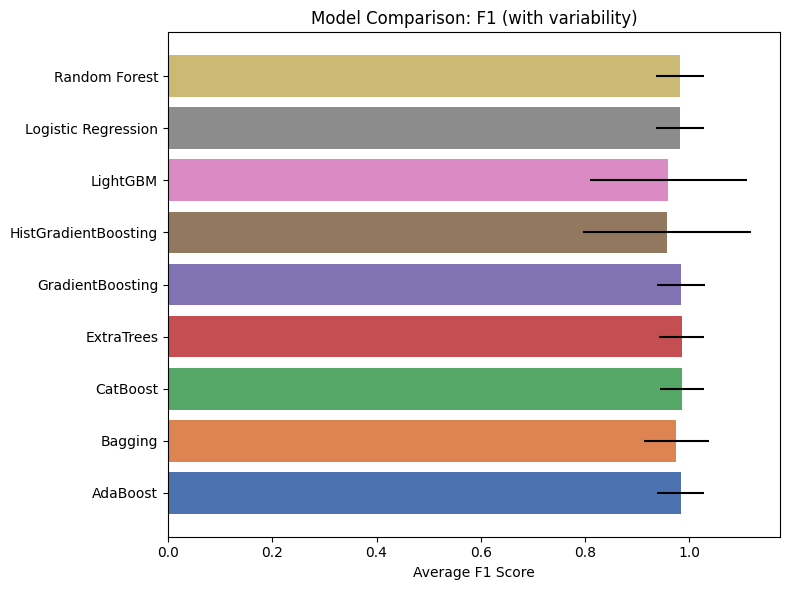

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

agg = results_df.groupby('Model').agg({'F1':['mean','std'], 'AP':'mean'}).reset_index()
agg.columns = ['Model','F1_mean','F1_std','PRAUC_mean']

# Plot using matplotlib directly to control xerr shape
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(
	agg['Model'],
	agg['F1_mean'],
	xerr=agg['F1_std'].values,
	color=sns.color_palette("deep", len(agg))
)
ax.set_xlabel('Average F1 Score')
ax.set_title('Model Comparison: F1 (with variability)')
plt.tight_layout()
plt.show()


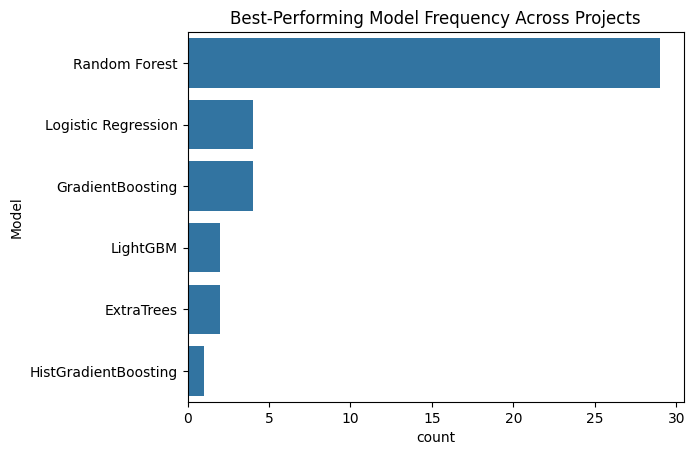

In [50]:
sns.countplot(data=best_models_df.reset_index(), y='Model', order=best_models_df['Model'].value_counts().index)
plt.title('Best-Performing Model Frequency Across Projects')
plt.show()


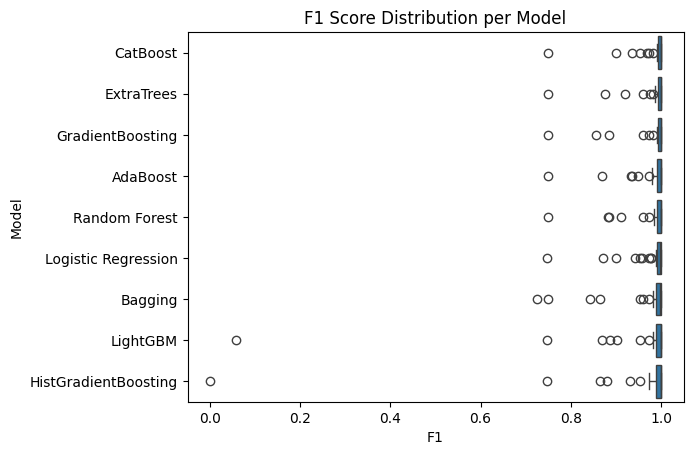

In [ ]:
sns.boxplot(data=results_df, x='F1', y='Model', order=agg.sort_values('F1_mean', ascending=False)['Model'])
plt.title('F1 Score Distribution per Model')
plt.show()


In [52]:
best_models

{12: {'Model': 'Random Forest',
  'Metrics': {'Accuracy': 1.0,
   'Precision': 1.0,
   'Recall': 1.0,
   'F1': 1.0,
   'TN': 0,
   'FP': 0,
   'FN': 0,
   'TP': 0,
   'Specificity': 0,
   'AP': nan,
   'ROC-AUC': nan,
   'Brier': nan,
   'Log_Loss': nan,
   'Optimal_Threshold': 0.5,
   'Project_ID': 12,
   'Model': 'Random Forest',
   'Sample_Size': 650,
   'Class_0_Count': 304,
   'Class_1_Count': 346,
   'Params': {'classifier__n_estimators': 100,
    'classifier__min_samples_split': 5,
    'classifier__min_samples_leaf': 1,
    'classifier__max_features': 0.7,
    'classifier__max_depth': 15}},
  'Model_Object': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('num',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='median')),
                                       

In [53]:
projectid = df_sorted["projectid"].unique().tolist()

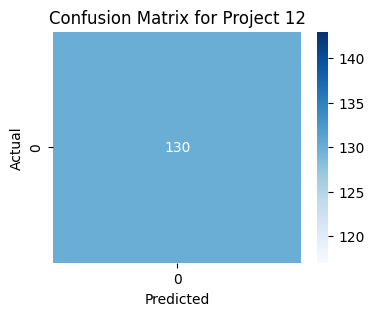

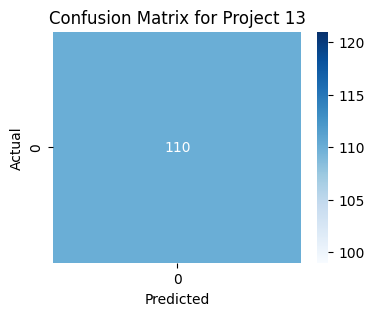

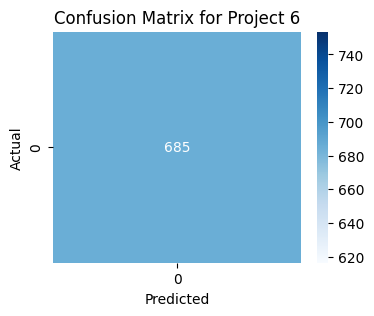

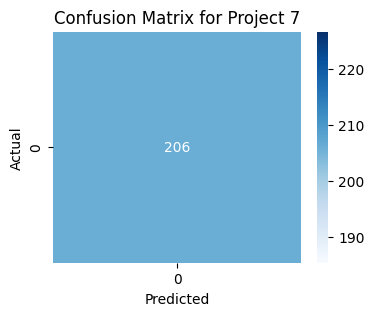

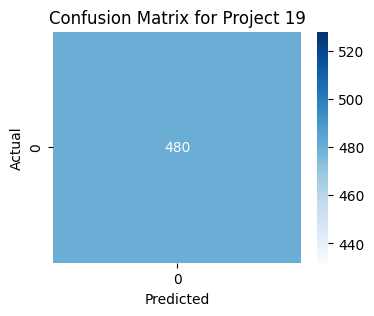

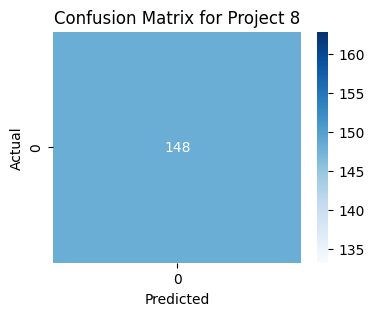

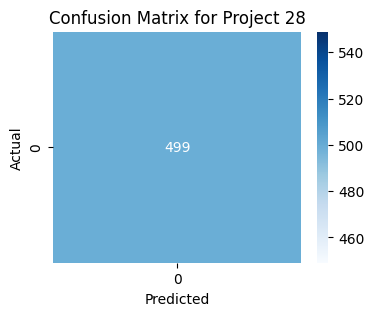

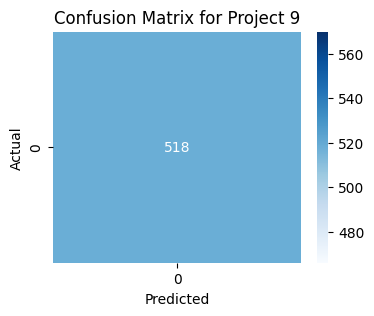

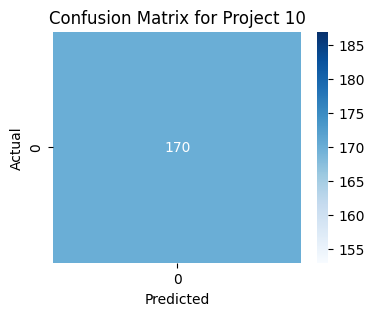

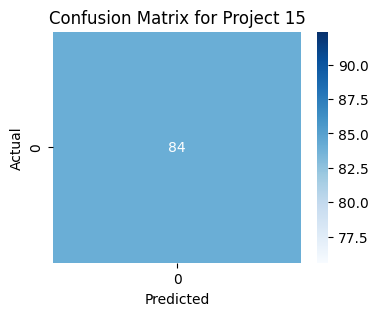

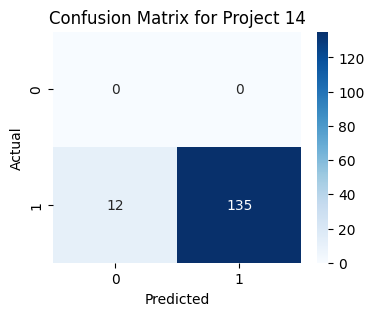

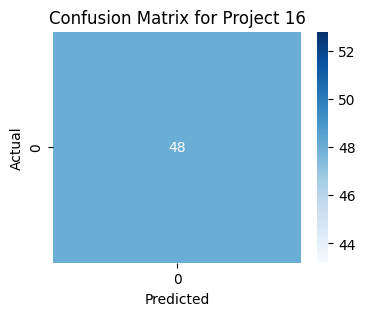

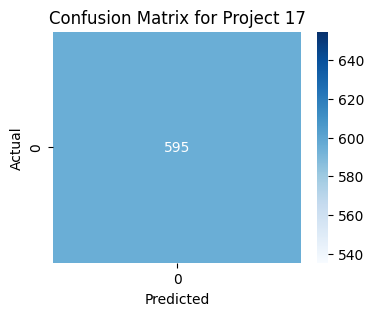

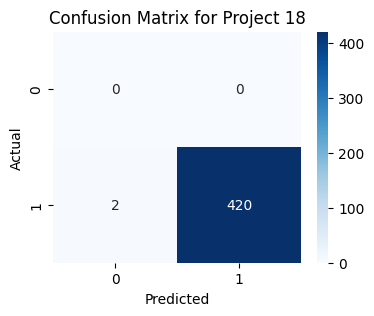

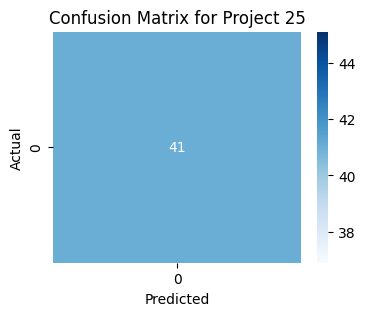

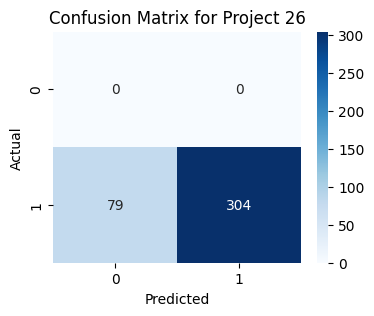

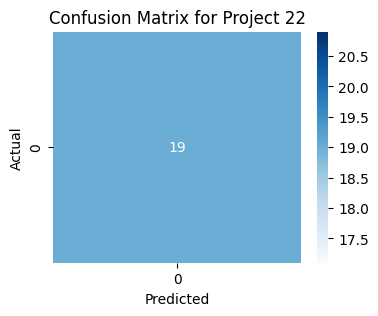

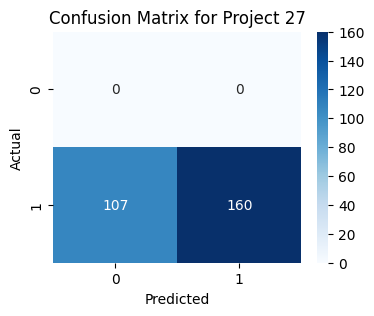

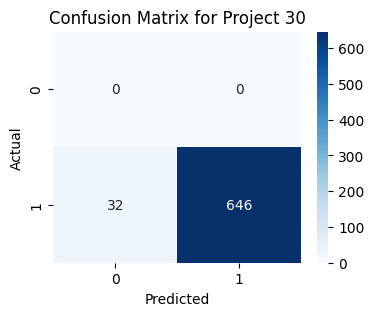

Skipping project 29: No trained model available.
Skipping project 24: No trained model available.
Skipping project 21: No trained model available.


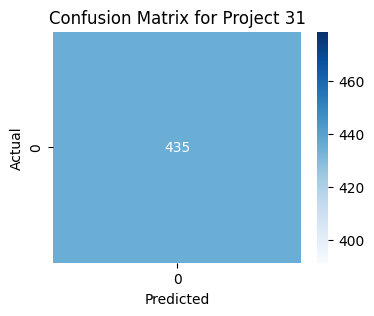

Skipping project 45: No trained model available.


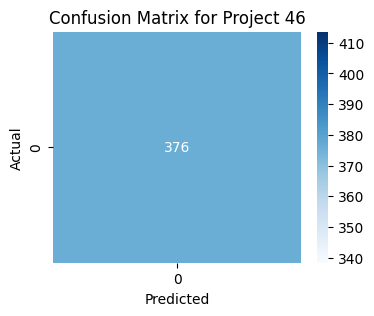

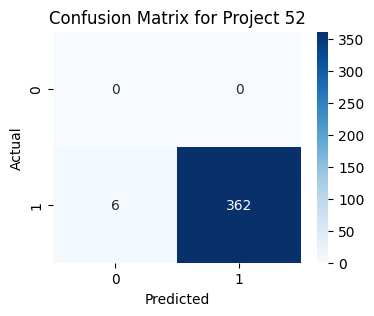

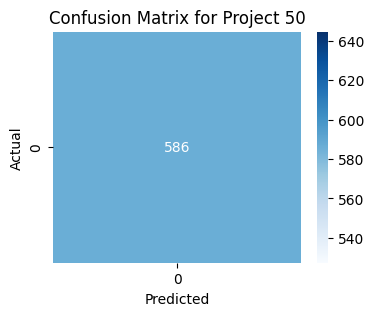

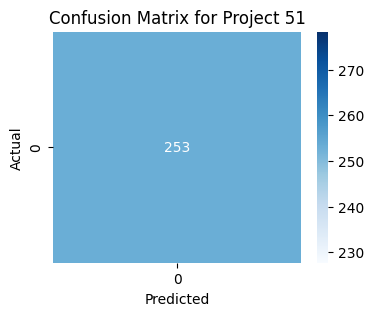

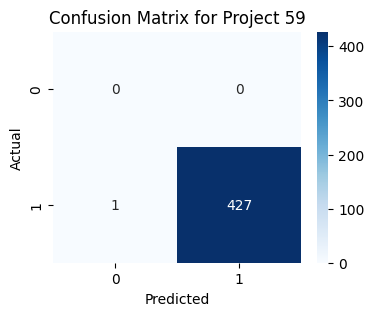

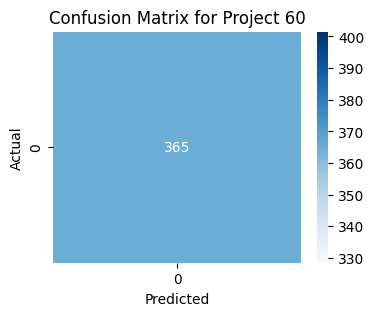

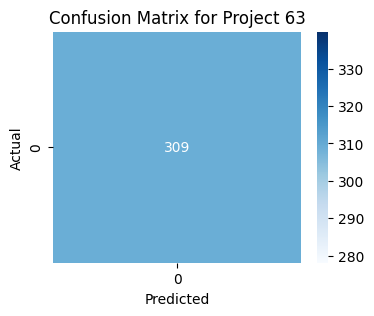

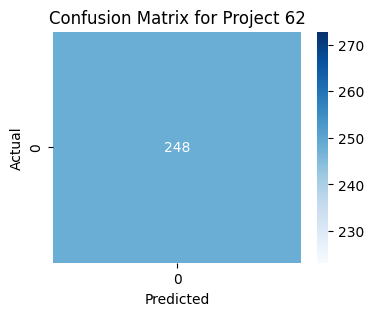

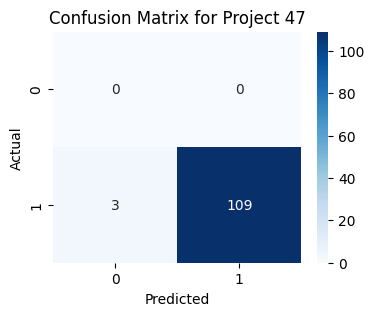

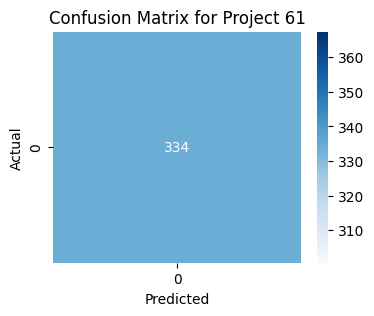

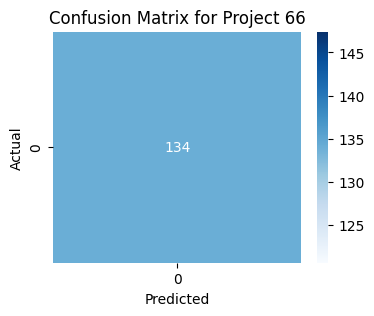

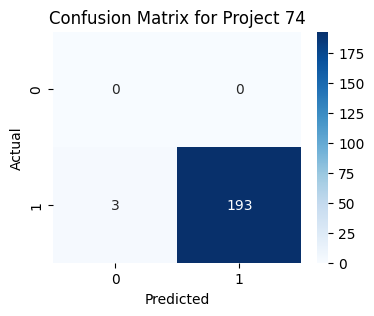

Skipping project 48: No trained model available.


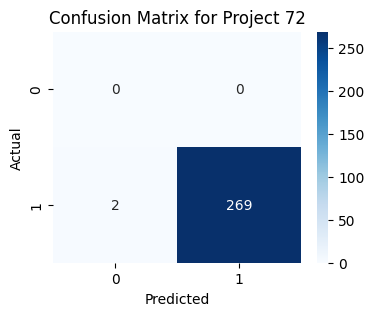

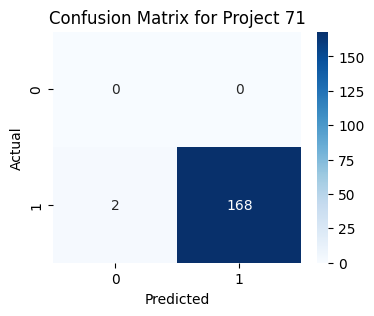

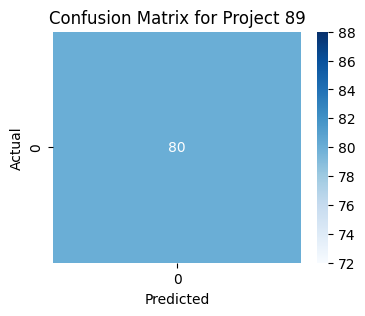

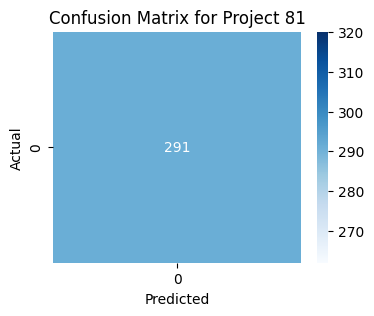

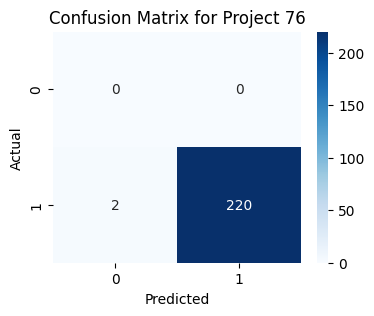

Skipping project 94: No trained model available.


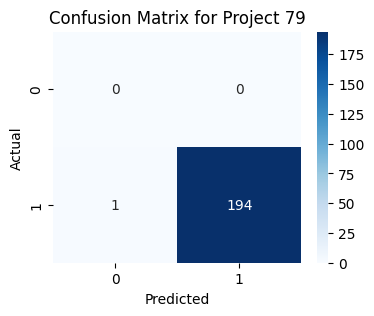

Skipping project 49: No trained model available.


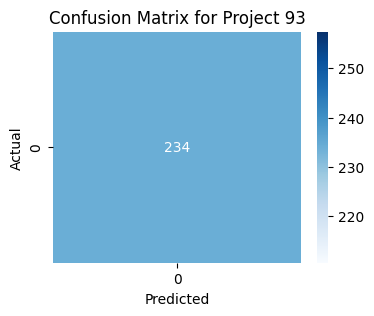

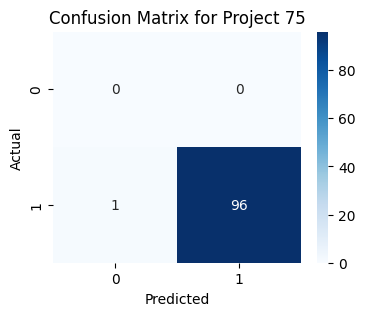

Skipping project 98: No trained model available.


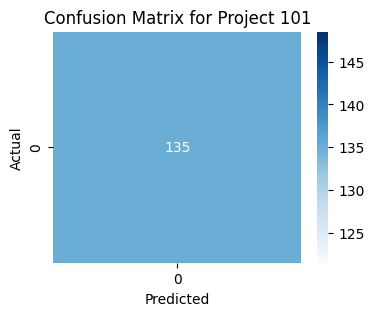

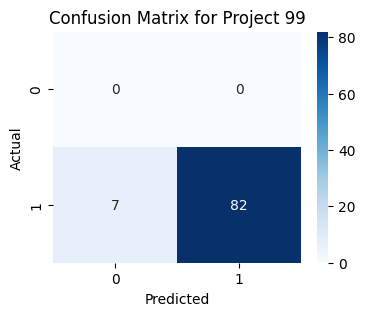

Skipping project 104: No trained model available.
Skipping project 103: No trained model available.
Skipping project 97: No trained model available.


In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for pid in projectid:
    if pid not in best_models:
        print(f"Skipping project {pid}: No trained model available.")
        continue

    # Get best model object for this project
    model_data = best_models[pid]
    model = model_data['Model_Object']
    optimal_threshold = model_data['Metrics'].get('Optimal_Threshold', 0.5)

    # Get project data
    project_df = df_sorted[df_sorted['projectid'] == pid].sort_index()
    X_train, X_val, y_train, y_val = time_split(project_df)

    # Drop constant columns (as done during training)
    constant_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
    X_val = X_val.drop(columns=constant_features)

    # Predict probabilities or decision function
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, "decision_function"):
        df = model.decision_function(X_val)
        y_probs = (df - df.min()) / (df.ptp() + 1e-8)
    else:
        y_probs = model.predict(X_val)

    # Apply threshold and compute confusion matrix
    y_pred = (y_probs >= optimal_threshold).astype(int)
    cm = confusion_matrix(y_val, y_pred)
    
    # Visualize
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Project {pid}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Export model

In [ ]:
import joblib
import os

export_dir = "backend/saved_models"
os.makedirs(export_dir, exist_ok=True)

print(f"Exporting {len(best_models)} models to '{export_dir}'...")

# Export each best model
for project_id, model_data in best_models.items():
    try:
        # This is the actual trained pipeline/model
        model_pipeline = model_data.get("Model_Object")
        if model_pipeline is None:
            print(f"⚠️ Skipping project {project_id}: No trained model object found.")
            continue

        # --- MODIFIED AND SIMPLIFIED SAVE DICTIONARY ---
        # The pipeline (model_pipeline) contains everything needed for prediction.
        # We save it along with the feature names and performance metrics for metadata.
        save_dict = {
            "model": model_pipeline,
            "features": list(model_pipeline.feature_names_in_), # Get features from the pipeline
            "metrics": model_data.get("Metrics", {})
        }
        # Note: We no longer save "preprocessor" separately because it's inside "model".

        file_path = f"{export_dir}/project_{project_id}_model.pkl"
        joblib.dump(save_dict, file_path)
        print(f"✅ Successfully saved model for project {project_id} to {file_path}")

    except Exception as e:
        print(f"❌ Error saving project {project_id}: {e}")

print("\nModel export complete.")

Exporting 42 models to 'backend/saved_models'...
✅ Successfully saved model for project 12 to backend/saved_models/project_12_model.pkl
✅ Successfully saved model for project 13 to backend/saved_models/project_13_model.pkl
✅ Successfully saved model for project 6 to backend/saved_models/project_6_model.pkl
✅ Successfully saved model for project 7 to backend/saved_models/project_7_model.pkl
✅ Successfully saved model for project 19 to backend/saved_models/project_19_model.pkl
✅ Successfully saved model for project 8 to backend/saved_models/project_8_model.pkl
✅ Successfully saved model for project 28 to backend/saved_models/project_28_model.pkl
✅ Successfully saved model for project 9 to backend/saved_models/project_9_model.pkl
✅ Successfully saved model for project 10 to backend/saved_models/project_10_model.pkl
✅ Successfully saved model for project 15 to backend/saved_models/project_15_model.pkl
✅ Successfully saved model for project 14 to backend/saved_models/project_14_model.pkl
✅ 

In [84]:
import joblib

export_dir = r"C:\Users\Khang Vinh Khac\Documents\ASW_ML_web\backend\model"
project_id = 6
model_path = f"{export_dir}/project_{project_id}_model.pkl"

try:
    loaded_model_data = joblib.load(model_path)
    model = loaded_model_data.get("model")
    preprocessor = loaded_model_data.get("preprocessor", None)
    features = loaded_model_data.get("features", [])

    if model is None:
        raise ValueError(f"No model found in the saved file for project {project_id}.")

    print(f"Model and related components for project {project_id} loaded successfully.")

except FileNotFoundError:
    print(f"Model file not found for project {project_id}.")
except Exception as e:
    print(f"Error loading model for project {project_id}: {str(e)}")


Model and related components for project 6 loaded successfully.


In [85]:
model

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Explanation of model

In [86]:
df_sorted.columns.to_list()

['projectid',
 'gender',
 'purchasing_reason',
 'decide_purchase_reason',
 'not_book_reason',
 'other_projects_before_deicde',
 'condo_payment',
 'day_off_activity',
 'most_interested_activites_participation',
 'room_size_wanted',
 'purchase_budget',
 'residences_count',
 'would_recommend',
 'information_source',
 'saw_sign',
 'car_type',
 'decision_time_frame',
 'family_monthly_income',
 'individual_monthly_income_baht',
 'exercise_preference',
 'condo_living_style',
 'car_brand',
 'purchase_intent',
 'travel_route_today',
 'marital_status',
 'occupation',
 'age',
 'Project Brand',
 'Project Type',
 'Starting Price',
 'Location',
 'has_booked',
 'hour_sin',
 'hour_cos',
 'day',
 'month',
 'quarter',
 'year',
 'week',
 'day_of_week',
 'is_weekend',
 'day_of_year',
 'season']

Model and related components for project 74 loaded successfully.
--- Prediction Results for Project ID: 74 ---


,projectid,has_booked,prediction_result
39381,74,0,0
59477,74,1,1
42785,74,1,1
42786,74,1,1
5334,74,0,0
...,...,...,...
14021,74,0,0
60441,74,1,1
12537,74,0,0
55139,74,1,1



--- Performance Metrics for Project ID: 74 ---

Overall Accuracy: 99.69%

Confusion Matrix:
  - True Negatives (Correctly said 'No'):  549
  - False Positives (Wrongly said 'Yes'):   0  <-- (Wasted effort)
  - False Negatives (Wrongly said 'No'):   3  <-- (Lost opportunity)
  - True Positives (Correctly said 'Yes'):  426


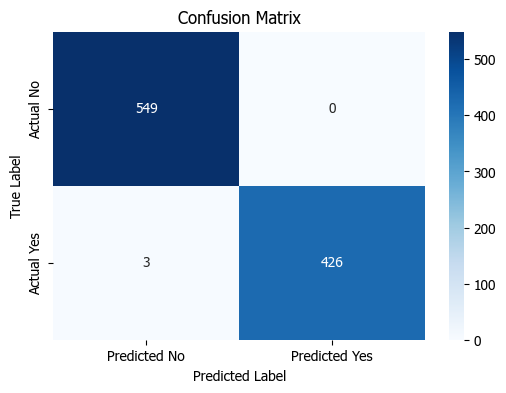


Detailed Classification Report:
                  precision    recall  f1-score   support

Did Not Book (0)       0.99      1.00      1.00       549
      Booked (1)       1.00      0.99      1.00       429

        accuracy                           1.00       978
       macro avg       1.00      1.00      1.00       978
    weighted avg       1.00      1.00      1.00       978



In [89]:
import joblib

export_dir = r"C:\Users\Khang Vinh Khac\Documents\ASW_ML_web\backend\model"
project_id = 74
model_path = f"{export_dir}/project_{project_id}_model.pkl"

try:
    loaded_model_data = joblib.load(model_path)
    model = loaded_model_data.get("model")
    preprocessor = loaded_model_data.get("preprocessor", None)
    features = loaded_model_data.get("features", [])

    if model is None:
        raise ValueError(f"No model found in the saved file for project {project_id}.")

    print(f"Model and related components for project {project_id} loaded successfully.")

except FileNotFoundError:
    print(f"Model file not found for project {project_id}.")
except Exception as e:
    print(f"Error loading model for project {project_id}: {str(e)}")


# Assume 'df_sorted', 'model', and 'project_id' are already loaded in your environment.
# Add necessary imports for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Safety check to ensure the dataframe and model exist.
if 'df_sorted' in locals() and 'model' in locals() and 'project_id' in locals():

    try:
        # 2. Select all data for the specific project_id.
        project_data = df_sorted[df_sorted['projectid'] == int(project_id)].copy()

        if not project_data.empty:
            # 3. Prepare the features (X) for the model.
            model_features = model.feature_names_in_
            X_to_predict = project_data[model_features]

            # 4. Make predictions.
            predictions_array = model.predict(X_to_predict)

            # 5. Add predictions to the dataframe.
            project_data['prediction_result'] = predictions_array

            # 6. Create the clean output dataframe.
            result_df = project_data[['projectid', 'has_booked', 'prediction_result']]

            # Display the results.
            print(f"--- Prediction Results for Project ID: {project_id} ---")
            display(result_df)

            # --- 7. NEW: Evaluate the model's performance ---
            print(f"\n--- Performance Metrics for Project ID: {project_id} ---")

            # Extract the true labels and the predicted labels for clarity
            y_true = result_df['has_booked']
            y_pred = result_df['prediction_result']

            # Calculate overall accuracy
            accuracy = accuracy_score(y_true, y_pred)
            print(f"\nOverall Accuracy: {accuracy:.2%}")

            # Calculate and display the confusion matrix for a "corrects and wrongs" breakdown
            print("\nConfusion Matrix:")
            cm = confusion_matrix(y_true, y_pred)
            
            # For nice printing, get the values from the matrix
            # Handles cases where the matrix might not be 2x2 (if only one class was predicted)
            if cm.size == 4:
                tn, fp, fn, tp = cm.ravel()
            else:
                # If only one class is present or predicted, create a default
                tn, fp, fn, tp = (cm[0,0], 0, 0, 0) if y_true.nunique() == 1 and y_true.iloc[0] == 0 else (0, 0, 0, cm[0,0])


            print(f"  - True Negatives (Correctly said 'No'):  {tn}")
            print(f"  - False Positives (Wrongly said 'Yes'):   {fp}  <-- (Wasted effort)")
            print(f"  - False Negatives (Wrongly said 'No'):   {fn}  <-- (Lost opportunity)")
            print(f"  - True Positives (Correctly said 'Yes'):  {tp}")

            # Visualize the confusion matrix for clarity
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                        xticklabels=['Predicted No', 'Predicted Yes'], 
                        yticklabels=['Actual No', 'Actual Yes'])
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.title('Confusion Matrix')
            plt.show()

            # Display a detailed classification report with Precision, Recall, and F1-score
            print("\nDetailed Classification Report:")
            # The `target_names` parameter makes the report much easier to read
            report = classification_report(y_true, y_pred, target_names=['Did Not Book (0)', 'Booked (1)'], zero_division=0)
            print(report)

        else:
            print(f"No data found for project ID: {project_id} in the dataframe.")

    except Exception as e:
        print(f"An error occurred during prediction or evaluation: {e}")

else:
    print("Could not perform prediction. Ensure 'df_sorted', 'model', and 'project_id' are all available.")

In [90]:
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['hour_sin', 'hour_cos', 'day', 'month', 'quarter', 'year',
       'day_of_week', 'day_of_year', 'season'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(s...
       'individual_monthly_income_baht', 'exercise_preference',
       'condo_living_style', 'ca

## Permutation Importance

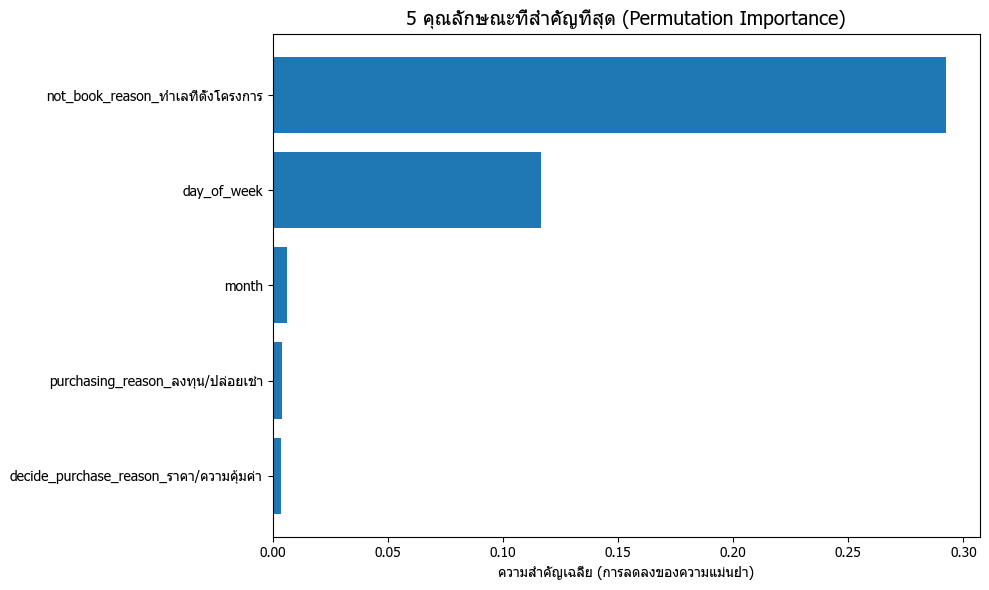

In [78]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Set a Thai-compatible font available on Windows (e.g., "Tahoma")
mpl.rcParams['font.family'] = 'Tahoma'

# Run permutation importance
result = permutation_importance(model, X_sample, predictions, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature names
cat_features = model.named_steps['preprocessor'].transformers_[1][2]
encoder = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
cat_feature_names = encoder.get_feature_names_out(cat_features)
num_feature_names = model.named_steps['preprocessor'].transformers_[0][2]
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Plot
sorted_idx = result.importances_mean.argsort()[::-1][:5]
plt.figure(figsize=(10, 6))
plt.barh(range(5), result.importances_mean[sorted_idx][::-1])
plt.yticks(range(5), np.array(all_feature_names)[sorted_idx][::-1])
plt.xlabel("ความสำคัญเฉลี่ย (การลดลงของความแม่นยำ)")  # Thai label
plt.title("5 คุณลักษณะที่สำคัญที่สุด (Permutation Importance)", fontsize=14)  # Thai title
plt.tight_layout()
plt.show()


## SHAP

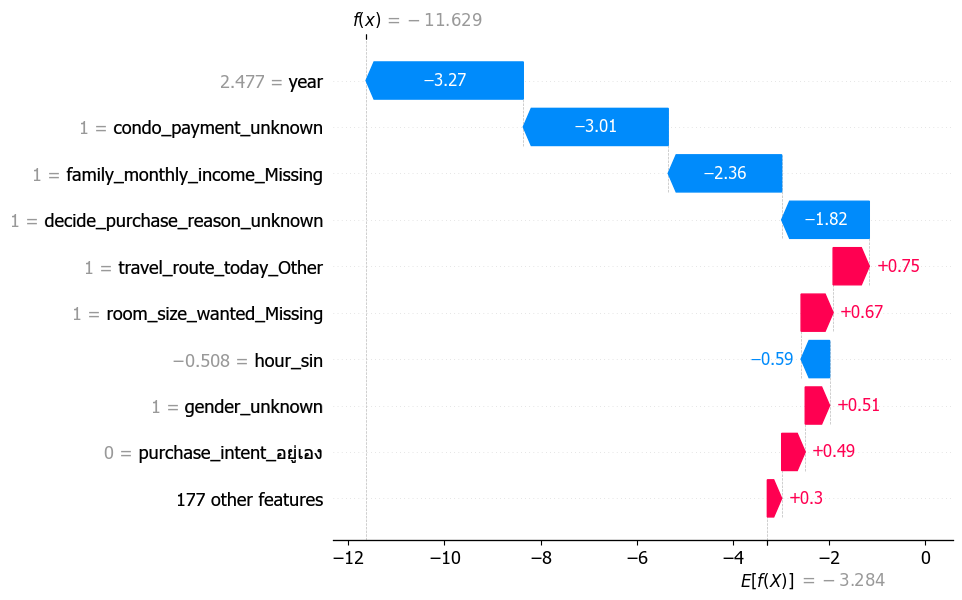

In [73]:
import shap

# Get the preprocessor and transform the data
preprocessor = model.named_steps['preprocessor']
X_transformed = preprocessor.transform(X_sample)

# Get feature names after preprocessing
feature_names = []
for name, transformer, features in preprocessor.transformers_:
    if name == 'num':
        # For numeric features, just use the original names
        feature_names.extend(features)
    elif name == 'cat':
        # For categorical features, get the one-hot encoded names
        encoder = transformer.named_steps['encoder']
        feature_names.extend(encoder.get_feature_names_out(features))
        
# Create explainer with feature names
explainer = shap.Explainer(model.named_steps['classifier'])
shap_values = explainer(X_transformed)

# Set the feature names
shap_values.feature_names = feature_names

# Now visualize with proper names
shap.plots.waterfall(shap_values[0])

## Interpret ML

In [74]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from interpret.blackbox import LimeTabular
from interpret.perf import ROC
from sklearn.model_selection import train_test_split

# Prepare data for interpretML (drop target and non-feature columns)
# Get the preprocessor and transform the data
preprocessor = model.named_steps['preprocessor']
X_transformed = preprocessor.transform(X_sample)
X = project_df.drop(columns=['has_booked', 'projectid'], errors='ignore')
y = project_df['has_booked']

# Split for demonstration (interpretML needs some test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Explainable Boosting Machine (EBM)
ebm = ExplainableBoostingClassifier(random_state=42)
ebm.fit(X_train, y_train)

# Global explanation
ebm_global = ebm.explain_global()
show(ebm_global)

# Local explanation for the first test sample
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)

# Optionally, show ROC curve
roc = ROC(ebm.predict_proba).explain_perf(X_test, y_test)
show(roc)

<!-- http://127.0.0.1:7001/1987591094592/ -->

<!-- http://127.0.0.1:7001/1987586594224/ -->

<!-- http://127.0.0.1:7001/1987572951488/ -->

## Simple Explanation

In [ ]:
import random
from IPython.display import display
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
pd.set_option('display.width', 20)
# === Random Project Analysis and Reasoning ===

# Step 1: Select a random project ID with a trained best model
random_project_id = random.choice(list(best_models.keys()))
print(f"\n=== Analyzing Project: {random_project_id} ===")

# Step 2: Retrieve project data
project_df = df_sorted[df_sorted['projectid'] == random_project_id].sort_index()
X_train, X_val, X_test, y_train, y_val, y_test = time_split(project_df)

# Drop constant columns
constant_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
X_test = X_test.drop(columns=constant_features)

# Step 3: Get best model for this project
model_data = best_models[random_project_id]
model = model_data['Model_Object']
optimal_threshold = model_data['Metrics'].get('Optimal_Threshold', 0.5)

# Step 4: Make predictions
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= optimal_threshold).astype(int)

# Step 5: Build result DataFrame
prediction_df = X_test.copy()
prediction_df['True_Label'] = y_test.values
prediction_df['Pred_Probability'] = y_probs
prediction_df['Prediction'] = y_pred

# Step 6: Add Reasoning (simple rule-based using top features if available)
top_features = top_features_global.head(5).index.tolist()

def generate_reasoning(row, features):
    reasons = []
    for feat in features:
        if feat in row:
            val = row[feat]
            if val > project_df[feat].median():
                reasons.append(f"{feat} is high")
            else:
                reasons.append(f"{feat} is low")
    return "; ".join(reasons[:5]) if reasons else "No dominant feature trend"

prediction_df['Reasoning'] = prediction_df.apply(lambda row: generate_reasoning(row, top_features), axis=1)

# Show sample
print("\n=== Sample Predictions and Reasoning ===")
print("Overall Accuracy:", accuracy_score(y_test, y_pred))
# display(prediction_df.style.set_properties(subset=['Reasoning'], **{'white-space': 'pre-wrap'}))
display(prediction_df[['True_Label', 
                       'Prediction', 
                       'Pred_Probability', 
                       'Reasoning']].style.set_properties(subset=['Reasoning'], **{'white-space': 'pre-wrap'}))



=== Analyzing Project: 49 ===

=== Sample Predictions and Reasoning ===
Overall Accuracy: 0.0547945205479452


,True_Label,Prediction,Pred_Probability,Reasoning
38819,0,0,0.000000,decision_time_frame is high; room_size_wanted is high; purchase_budget is low
39278,0,0,0.000000,decision_time_frame is high; room_size_wanted is low; purchase_budget is low
39279,0,0,0.000000,decision_time_frame is low; room_size_wanted is high; purchase_budget is high
39280,0,0,0.000000,decision_time_frame is low; room_size_wanted is high; purchase_budget is low
42876,1,0,0.000000,decision_time_frame is low; room_size_wanted is low; purchase_budget is low
42877,1,0,0.000000,decision_time_frame is low; room_size_wanted is high; purchase_budget is high
43288,1,0,0.000000,decision_time_frame is low; room_size_wanted is low; purchase_budget is low
44388,1,0,0.000000,decision_time_frame is low; room_size_wanted is low; purchase_budget is low
44389,1,0,0.000000,decision_time_frame is low; room_size_wanted is low; purchase_budget is low
45039,1,0,0.000000,decision_time_frame is low; room_size_wanted is high; purchase_budget is high
